In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
data = pd.read_csv('well_cleaned.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.fillna(0)

data.info()
model_mse_dict={}
model_R2_dict={}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5943 entries, 0 to 5942
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            5943 non-null   object 
 1   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 3   AVG_CHOKE_SIZE_P          5943 non-null   float64
 4   AVG_WHP_P                 5943 non-null   float64
 5   AVG_WHT_P                 5943 non-null   float64
 6   DP_CHOKE_SIZE             5943 non-null   float64
 7   BORE_OIL_VOL              5943 non-null   float64
 8   BORE_GAS_VOL              5943 non-null   float64
 9   BORE_WAT_VOL              5943 non-null   float64
 10  FLOW_KIND                 5943 non-null   object 
 11  WELL_TYPE                 5943 non-null   object 
dtypes: float64(9), object(3)
memory usage: 557.3+ KB


In [3]:
df1 = data.loc[:,'AVG_CHOKE_SIZE_P':'BORE_WAT_VOL']
df1=df1.drop(['DP_CHOKE_SIZE'], axis=1)
feature_names = df1.columns
df1.head()

,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,43.34,107.36,37.94,631.47,90439.09,0.0
1,47.17,99.19,60.76,1166.46,165720.39,0.0
2,47.73,94.60,63.05,1549.81,221707.31,0.0
3,48.53,89.99,64.55,1248.70,178063.52,0.0
4,49.84,84.78,65.72,1345.78,192602.19,0.0


In [4]:
X = df1
y = data['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1,1)

In [5]:
#Create Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Scaling the data
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(X_train)
X_train_s = x_scaler.transform(X_train)
X_test_s = x_scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler().fit( y_train)
y_train_s = y_scaler.transform( y_train)
y_test_s = y_scaler.transform(y_test)

RANDOM FOREST REGRESSION

Model:RANDOM FOREST REGRESSION
R2 Score: 0.8340269728492401
Mean Squared Error (MSE): 0.16324007218976155
R-squared (R2 ): 0.8340269728492402


Text(0.5, 1.0, 'Residual Plot')

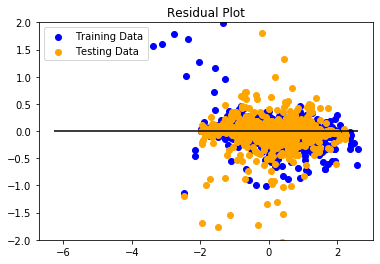

In [15]:
## training the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=100)
rf.fit(X_train_s,y_train_s.ravel())
score = rf.score(X_test_s, y_test_s.ravel())
print("Model:RANDOM FOREST REGRESSION")
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = rf.predict(X_test_s)
mse = mean_squared_error(y_test_s.ravel(), predicted_train)
r2 = r2_score(y_test_s.ravel(), predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(RAND_FOR_REG = mse)
model_R2_dict.update(RAND_FOR_REG = r2)


# Plot the Residuals for the Training and Testing data
plt.scatter(rf.predict(X_train_s), rf.predict(X_train_s) - y_train_s.ravel(), c="blue", label="Training Data")
plt.scatter(rf.predict(X_test_s), rf.predict(X_test_s) - y_test_s.ravel(), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=rf.predict(X_train_s).min(), xmax=rf.predict(X_train_s).max())
plt.ylim(-2,2)
plt.title("Residual Plot")

In [16]:
importances= rf.feature_importances_
sorted(zip(importances,feature_names),reverse=True)

[(0.33312639607447136, 'AVG_WHP_P'),
 (0.2633533064833538, 'AVG_WHT_P'),
 (0.15304980262323148, 'BORE_WAT_VOL'),
 (0.09364173516794187, 'AVG_CHOKE_SIZE_P'),
 (0.09171718569358538, 'BORE_GAS_VOL'),
 (0.06511157395741615, 'BORE_OIL_VOL')]

RIDGE REGRESSION

R2 Score: 0.5781779756739883
Mean Squared Error (MSE): 0.41487619334473474
R-squared (R2 ): 0.5781779756739883


Text(0.5, 1.0, 'Residual Plot')

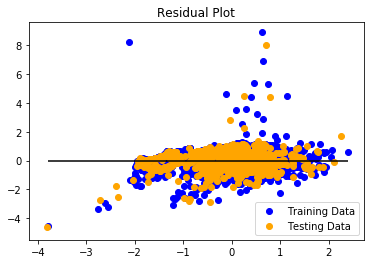

In [22]:
## training the model
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.05, normalize=False) #False gives slightly better value
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(RIDGE_REG = mse)
model_R2_dict.update(RIDGE_REG = r2)

# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=model.predict(X_train_s).min(), xmax=model.predict(X_train_s).max())
plt.title("Residual Plot")

In [18]:
importances= model.coef_
sorted(zip(importances[0],feature_names),reverse=True)

[(1.1348855538005445, 'BORE_OIL_VOL'),
 (0.8635634153605024, 'AVG_WHP_P'),
 (0.3419462804988617, 'BORE_WAT_VOL'),
 (0.31985281336616056, 'AVG_CHOKE_SIZE_P'),
 (0.301017124026932, 'AVG_WHT_P'),
 (-1.570476240545254, 'BORE_GAS_VOL')]

LASSO REGRESSION

R2 Score: 0.5787553140270549
Mean Squared Error (MSE): 0.41430836159489925
R-squared (R2 ): 0.5787553140270549


C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.71446108336454, tolerance: 0.4457000000000002
  positive)


Text(0.5, 1.0, 'Residual Plot')

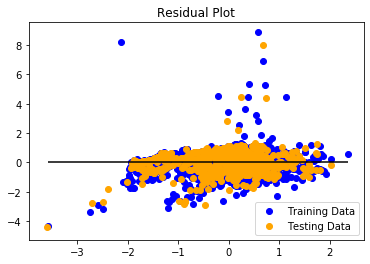

In [24]:
## training the model
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.001, normalize=False) #False gives slightly better value
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(LASSO_REG = mse)
model_R2_dict.update(LASSO_REG = r2)

# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s.ravel(), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s.ravel(), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=model.predict(X_train_s).min(), xmax=model.predict(X_train_s).max())
plt.title("Residual Plot")

In [27]:
importances= model.coef_
sorted(zip(importances,feature_names),reverse=True)

[(0.8519668194470716, 'AVG_WHP_P'),
 (0.3811997764061222, 'BORE_OIL_VOL'),
 (0.3263488134174493, 'AVG_CHOKE_SIZE_P'),
 (0.31668905692893834, 'BORE_WAT_VOL'),
 (0.30515311064000555, 'AVG_WHT_P'),
 (-0.8168106615395307, 'BORE_GAS_VOL')]

In [28]:
#Displaying the MSE scores by models
model_mse_dict

{'RAND_FOR_REG': 0.16324007218976155,
 'RIDGE_REG': 0.41487619334473474,
 'LASSO_REG': 0.41430836159489925}

In [29]:
#Displaying the R2 scores by models
model_R2_dict

{'RAND_FOR_REG': 0.8340269728492402,
 'RIDGE_REG': 0.5781779756739883,
 'LASSO_REG': 0.5787553140270549}

In [ ]:
#Box plot by well